In [1]:
%matplotlib inline

import json, glob, sys, os, gzip, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import requests

from scipy import interpolate

/cms/base/Miniconda/miniconda/lib/python3.7/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (2.2.1) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
df_br = pd.read_csv("/cms/routray/Brmumu.tsv", delimiter = "\t", header=None)
df_ct = pd.read_csv("/cms/routray/tau.tsv", delimiter = "\t", header=None)
df_br = df_br[df_br[1] != 0]
# df_ct

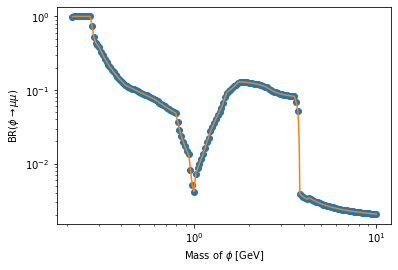

In [3]:
f = interpolate.interp1d(df_br[0].tolist(), df_br[1].tolist(), bounds_error=None)

xnew = np.arange(0.215, 10, 0.001)
ynew = f(xnew)  
# print(ynew)
plt.plot(df_br[0].tolist(), df_br[1].tolist(), 'o', xnew, ynew, '-')
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"BR($\phi\rightarrow\mu\mu$)")
plt.xlabel(r"Mass of $\phi$ [GeV]")

plt.show()

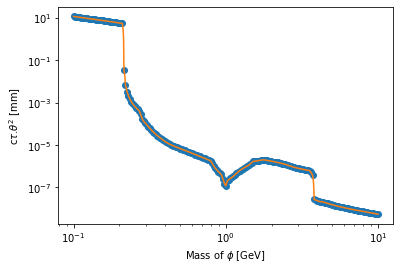

In [4]:
f = interpolate.interp1d(df_ct[0].tolist(), np.array(df_ct[1].tolist())*299792458000, bounds_error=None)

xnew = np.arange(0.1, 10, 0.001)
ynew = f(xnew)  
# print(ynew)
plt.plot(df_ct[0].tolist(), np.array(df_ct[1].tolist())*299792458000, 'o', xnew, ynew, '-')
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"c$\tau$.${\theta}^{2}$ [mm]")
plt.xlabel(r"Mass of $\phi$ [GeV]")

plt.show()

In [5]:
def get_thetasq(mass,ctau):
    f = interpolate.interp1d(df_ct[0].tolist(), np.array(df_ct[1].tolist())*299792458000, bounds_error=None)
    return f(mass)/ctau

def get_br(mass):
    f = interpolate.interp1d(df_br[0].tolist(), df_br[1].tolist(), bounds_error=None)    
    return f(mass)

# def get_br_arr(mass):
#     f = interpolate.interp1d(df_br[0].tolist(), df_br[1].tolist(), bounds_error=None)    
#     return float(f(mass))

print(get_thetasq(2,100),get_br(2))


1.725326120967147e-08 0.12597668788310082


In [6]:
df = pd.read_csv("https://hardikroutray.github.io/displaced_scouting/unblind/results/bphilimits_alldata_allctaus_wstheta_analysisDP_v1.csv")
# df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(["BRtheory"],axis=1,inplace=True)
# df["theta_sq_inflaton"] = get_thetasq(df["mass"],df["ctau"])
# df["BRULobs_inflaton"] = df["BRbrULobs"]/get_br(df["mass"])

ratio = df["mass"]**2/5.279**2

# df["BRtheory"] = 4.8*((1-((df["mass"]**2)/(5.279**2)))**2)*(df["theta_sq_inflaton"])
df["BRtheory"] = 4.8*((1-ratio)**2)*(df["theta_sq_inflaton"])
df["excl"] = df["BRULobs_inflaton"] < df["BRtheory"]
# df["BRplot"] = df["BRULobs_inflaton"] * df["excl"]


# df.to_csv("/cms/scoutingmuon/hardik/unblind/CMSSW_10_2_13/src/HiggsAnalysis/CombinedLimit/limits_v1/BPhi_2mu_v3/bphilimits_alldata_allctaus_wstheta_analysisDP_v1.csv", index=False)
df

,mass,stheta_sq,ctau,BRbrULobs,BRULobs,theta_sq_inflaton,BRULobs_inflaton,excl,BRtheory
0,0.3,6.412669e-04,0.1,9.580597e-08,3.787260e-07,9.757958e-04,2.472736e-07,True,4.653616e-03
1,0.3,3.206334e-04,0.2,2.820734e-08,1.115051e-07,4.878979e-04,7.280266e-08,True,2.326808e-03
2,0.3,1.282534e-04,0.5,1.330408e-08,5.259173e-08,1.951592e-04,3.433761e-08,True,9.307231e-04
3,0.3,6.412669e-05,1.0,1.085803e-08,4.292234e-08,9.757958e-05,2.802438e-08,True,4.653616e-04
4,0.3,8.015836e-05,0.8,1.149619e-08,4.544503e-08,1.219745e-04,2.967146e-08,True,5.817020e-04
...,...,...,...,...,...,...,...,...,...
2972,5.0,2.877833e-09,10.0,8.117690e-11,1.549889e-08,1.536709e-09,2.853291e-08,False,7.811534e-11
2973,5.0,1.438917e-09,20.0,8.729528e-11,1.666705e-08,7.683544e-10,3.068347e-08,False,3.905767e-11
2974,5.0,5.755666e-10,50.0,1.228478e-10,2.345501e-08,3.073418e-10,4.317986e-08,False,1.562307e-11
2975,5.0,3.597291e-10,80.0,1.686908e-10,3.220767e-08,1.920886e-10,5.929321e-08,False,9.764417e-12


In [7]:
mask_ranges = np.array([
    [0.43,0.49],
    [0.52,0.58],
    [0.73,0.84],
    [0.96,1.08],
    [2.91,3.27],
    [3.47,3.89],
    [8.99,9.87],
    [9.61,10.77],
    ])
mask_ranges[:,0] = mask_ranges[:,0]/(1+0.05)
mask_ranges[:,1] = mask_ranges[:,1]/(1-0.05)

x = np.concatenate([[0.],mask_ranges.flatten(),[50.]])
temp = np.c_[x[:-1], x[1:]][0::2]
unmasked_ranges = []
for low, high in temp:
    count = df["mass"].between(low, high).sum()
    if count >0:
        unmasked_ranges.append([low,high])
unmasked_ranges = np.array(unmasked_ranges)
unmasked_ranges

array([[0.        , 0.40952381],
       [0.61052632, 0.6952381 ],
       [0.88421053, 0.91428571],
       [1.13684211, 2.77142857],
       [4.09473684, 8.56190476]])

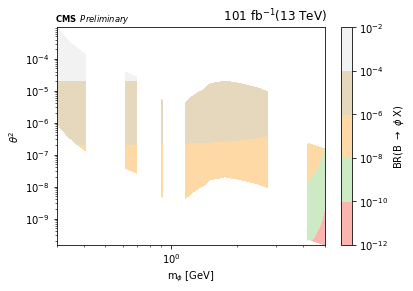

In [8]:
# df = pd.read_csv("/cms/scoutingmuon/hardik/unblind/CMSSW_10_2_13/src/HiggsAnalysis/CombinedLimit/limits_v1/BPhi_2mu_v3/bphilimits_alldata_allctaus_wstheta_analysisDP_v1.csv")

x = np.array(df["mass"]).reshape(-1,13)
# y = np.array(df["ctau"]).reshape(-1,13)
y = np.array(df["theta_sq_inflaton"]).reshape(-1,13)
# z = np.array(df["BRbrULobs"]).reshape(-1,13)
# z = np.array(df["BRULobs_inflaton"]).reshape(-1,13)
z = np.array(df["BRtheory"]).reshape(-1,13)
# z = np.array(df["BRplot"]).reshape(-1,13)

fig = plt.figure()

from matplotlib.colors import LogNorm
norm = LogNorm()
cb = plt.contourf(x,y,z,cmap="Pastel1",norm=norm)
# cb = plt.scatter(x,y,c=z, s=1.0, norm=norm)
# cb = plt.contourf(x,y,z,[1e-8,2e-6], colors=["r"])

plt.yscale("log")
plt.xscale("log")
plt.xlim([0.3,5])
ylim = plt.ylim()
for low,high in mask_ranges:
    plt.fill_betweenx(ylim, low, high, color="1.0", zorder=2)
    
plt.xlabel(r"m$_{\phi}$ [GeV]")
plt.ylabel(r"$\theta^{2}$")
plt.title(r"${}_\mathbf{CMS}$ ${}_\mathit{Preliminary}$                         101 fb$^{-1}$(13 TeV)")
fig.colorbar(cb, label=r"BR(B $\rightarrow$ $\phi$ X)")#".BR($\phi$ $\rightarrow$ $\mu\mu$)")


fig.patch.set_alpha(1)